<div style="background:red">&nbsp;</div>
<h1>Занятие 2</h1>
<div style="background:red">&nbsp;</div>

In [1]:
# загрузим библиотеки
import numpy as np
import pandas as pd

## Задание 1

Создайте массив массив из 100 элементов (от 1 до 100), переформатируйте в формат (10 * 10), сделайте слайсинг с шагом 2 по каждой оси.

In [2]:
a = np.arange(start=1, stop=101).reshape((10, 10))[::2,::2]
a

array([[ 1,  3,  5,  7,  9],
       [21, 23, 25, 27, 29],
       [41, 43, 45, 47, 49],
       [61, 63, 65, 67, 69],
       [81, 83, 85, 87, 89]])

## Задание 2

Написать функцию, которая по заданной длине последовательности находит среднее арифметическое ее членов.

Реализуйте задачу с и без помощи numpy, сравните время выполнения

In [4]:
%%time
# зададим длину нашей последовательности
dlina_posl = 100_000_000

# использование numpy
b = np.arange(dlina_posl).mean()
b

Wall time: 444 ms


49999999.5

In [5]:
%%time
# решение без использования numpy

a = [x for x in range(dlina_posl)]
sum(a)/len(a)

Wall time: 13.3 s


49999999.5

## Задание 3

Задан Series объект s, найти индекс первого элемента отсортированного s, где значения больше 5

In [56]:
# задано изначально
r = np.random.RandomState(1)
s = pd.Series(r.uniform(0, 10, 100))

In [72]:
s[s.gt(5)].sort_values().index[0]

67

## Задание 4

Предположим, что мы наблюдаем за некоторым признаком нашего датасета, но в данных есть пропуски. Ваша задача: реализовать алгоритм заполнения пропущенных значений последним известным с помощью средств python и pandas. (подсказка: вам может помочь функция np.isnan(), которая возвращает True, если число - nan. Для реализации с пандас стоит посмотреть на метод .fillna).

Изначальный код с инициализацией такого датасета предоставлен.

In [33]:
# импортируем библиотеку для создания шума
import random
# библиотека для визуализации
import matplotlib.pyplot as plt

# создадим наши данные и добавим к каждой точке синусоиды случайный шум
a = np.linspace(0, 25, 100)
a = np.sin(a) + [random.gauss(0, 0.2) for i in range(len(a))]

# создадим 10 случайных пропусков
for i in range(10):
    a[random.randint(0, len(a) - 1)] = None
# создадим датафрейм
df = pd.DataFrame({'target':a})

# выведем индексы всех затертых элементов
df[df.isna().any(axis=1)]

,target
6,NaN
8,NaN
9,NaN
12,NaN
29,NaN
46,NaN
62,NaN
84,NaN
89,NaN
90,NaN


In [35]:
# здесь в качестве параметра в head передадим значение, достаточное для наблюдения корректности заполнения пропусков
df.fillna(method='ffill', inplace=True)
df.head(15)

,target
0,-0.111170
1,0.367507
2,0.263086
3,0.307105
4,0.795337
5,0.957590
6,0.957590
7,1.261412
8,1.261412
9,1.261412


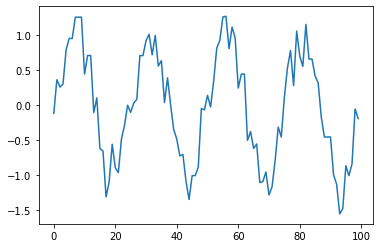

In [36]:
# на графике заметны характерные "ступеньки" в местах заполненных пропусков
plt.plot(df.target.values)

## Задание 5

Имеется небольшой игрушечный датафрейм, в котором необходимо провести несколько типов фильтраций (ответы ищите в решениях) и отобразить результат:

* всех, кто старше 40
* всех, кто имеет доход выше среднего по датасету
* всех, кто имеет доход выше среднего по датасету, но надежность ниже среднего по датасету

создать новые столбцы:

* важность клиента = доход * надежность
* возможная долгосрочность клиента = важность клиента * (средний возраст по датасету - возраст клиента)

`подсказка: двойные условия записываются так: (условие 1) & (условие 2)`


** примечание: столбцы не имеют отношения к реальным формулам или моделям, они необходимы только для наглядности

In [73]:
# создадим тестовый датасет
df = pd.DataFrame({
    'имя': ['Петя', 'Вася', 'Аня', 'Света'],
    'возраст': [45, 26, 41 , 21],
    'доход': [100000, 80000, 150000, 60000],
    'надежность клиента (0..1)': [0.65, 0.74, 0.87, 0.68],
    'пол': ['муж', 'муж', 'жен', 'жен']},
    index=[0, 1, 2, 3])

In [74]:
df

,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж
1,Вася,26,80000,0.74,муж
2,Аня,41,150000,0.87,жен
3,Света,21,60000,0.68,жен


In [77]:
df[df['возраст']>40]

,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж
2,Аня,41,150000,0.87,жен


In [78]:
df[df['доход']>df['доход'].mean()]

,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж
2,Аня,41,150000,0.87,жен


In [79]:
df[(df['доход']>df['доход'].mean()) & (df['надежность клиента (0..1)']<df['надежность клиента (0..1)'].mean())]

,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж


In [81]:
df['Важность клиента'] = df['доход']*df['надежность клиента (0..1)']
df

,имя,возраст,доход,надежность клиента (0..1),пол,Важность клиента
0,Петя,45,100000,0.65,муж,65000.0
1,Вася,26,80000,0.74,муж,59200.0
2,Аня,41,150000,0.87,жен,130500.0
3,Света,21,60000,0.68,жен,40800.0


In [83]:
df['возможная долгосрочность клиента'] = df['Важность клиента']*(df['возраст'].mean()-df['возраст'])
df

,имя,возраст,доход,надежность клиента (0..1),пол,Важность клиента,возможная долгосрочность клиента
0,Петя,45,100000,0.65,муж,65000.0,-763750.0
1,Вася,26,80000,0.74,муж,59200.0,429200.0
2,Аня,41,150000,0.87,жен,130500.0,-1011375.0
3,Света,21,60000,0.68,жен,40800.0,499800.0


## Задание 6

Посмотрите на блок Exploratory data analysis, используйте данные, кототрые вы загрузили в ходе его освоения. Ваша задача - вывести имена всех выживших детей и их количество

In [84]:
data = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

In [85]:
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [90]:
survived_children_df = data[(data['Survived']==1) & (data['Age']<18)]['Name']
# длина Series выводится последней строкой (65 выживших детей)
survived_children_df

9           Mrs. Nicholas (Adele Achem) Nasser
10              Miss. Marguerite Rut Sandstrom
22                          Miss. Anna McGowan
39                  Miss. Jamila Nicola-Yarred
42     Miss. Simonne Marie Anne Andree Laroche
                        ...                   
826     Mrs. Antoni (Selini Alexander) Yasbeck
827             Master. George Sibley Richards
849                   Miss. Mary Conover Lines
865             Master. Harold Theodor Johnson
871                   Miss. Adele Kiamie Najib
Name: Name, Length: 65, dtype: object

In [91]:
list(survived_children_df)

['Mrs. Nicholas (Adele Achem) Nasser',
 'Miss. Marguerite Rut Sandstrom',
 'Miss. Anna McGowan',
 'Miss. Jamila Nicola-Yarred',
 'Miss. Simonne Marie Anne Andree Laroche',
 'Miss. Constance Mirium West',
 'Master. Gerios Moubarek',
 'Miss. Erna Alexandra Andersson',
 'Master. Alden Gates Caldwell',
 'Miss. Bertha Ilett',
 'Master. Elias Nicola-Yarred',
 'Miss. Anna Peter',
 'Miss. Katherine Gilnagh',
 'Master. Frank John William Goldsmith',
 'Miss. Eleanor Ileen Johnson',
 'Master. Richard F Becker',
 'Miss. Luise Gretchen Kink-Heilmann',
 'Master. Michel M Navratil',
 'Miss. Helen Carr',
 'Mr. Victor Francis Sunderland',
 'Miss. Lillian Gertrud Asplund',
 'Miss. Marjorie Collyer',
 'Master. Edvin Rojj Felix Asplund',
 'Master. Hudson Trevor Allison',
 'Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo) Penasco y Castellana',
 'Miss. Jean Gertrude Hippach',
 'Master. Edmond Roger Navratil',
 'Master. William Loch Coutts',
 'Miss. Maria Nakid',
 'Miss. Bertha Lehmann',
 'Maste